In [1]:
from pandas import read_pickle, DataFrame, set_option

In [2]:
data = read_pickle("../data/data_all_features.pkl")

X_train = data.get("X_train")
y_train = data.get("y_train")
X_test = data.get("X_test")
feature_names = data.get("feature_names")
categorical = data.get("categorical")
numerical = data.get("numerical")
id_numeration_train = data.get("id_numeration_train")
id_numeration_test = data.get("id_numeration_test")

In [3]:
def get_visitor_dataframe(X_train, y_train):
    visitor_dataframe = DataFrame(columns=feature_names, data=X_train)
    visitor_dataframe["totals_transaction_revenue"] = y_train
    return visitor_dataframe

def remove_non_paying_visitors(visitor_dataframe):
    visits_with_positive_revenue = visitor_dataframe[visitor_dataframe["totals_transaction_revenue"] > 0]
    return visits_with_positive_revenue

In [4]:
visitor_dataframe = get_visitor_dataframe(X_train, y_train)
paying_visitor_dataframe = remove_non_paying_visitors(visitor_dataframe)

In [5]:
X_dataframe = paying_visitor_dataframe.drop(columns=["totals_transaction_revenue"])
paying_dict = X_dataframe.to_dict("tight")
X = paying_dict.get("data")

In [6]:
y = paying_visitor_dataframe["totals_transaction_revenue"].values

In [7]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define the model
model = LinearRegression()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.coef_

# summarize feature importance
for index, value in enumerate(importance):
    try:
        print(f"Feature: {feature_names[index]: <60} Score: {value: <20}")
    except:
        pass

Feature: visitNumber                                                  Score: 7661119.552485617   
Feature: totals_bounces                                               Score: 0.013398734947259072
Feature: totals_hits                                                  Score: 3628089.370605995   
Feature: totals_newVisits                                             Score: -52458392.707273155 
Feature: totals_pageviews                                             Score: -2802847.0217099935 
Feature: trafficSource_adwordsClickInfo.page                          Score: 76558224.67433956   
Feature: trafficSource_isTrueDirect                                   Score: -31177308.154786248 
Feature: device_isMobile                                              Score: -31247657.26963348  
Feature: channelGrouping_Affiliates                                   Score: 11082909.900303904  
Feature: channelGrouping_Direct                                       Score: 62458839.709309526  
Feature: channelGrou

In [10]:
feature_importance_dataframe = DataFrame(importance, columns=["importance"])
feature_importance_dataframe["feature_name"] = feature_names
feature_importance_dataframe["importance_abs"] = feature_importance_dataframe["importance"].abs()

feature_importance_dataframe.sort_values(by=['importance_abs'], inplace=True, ascending=False)

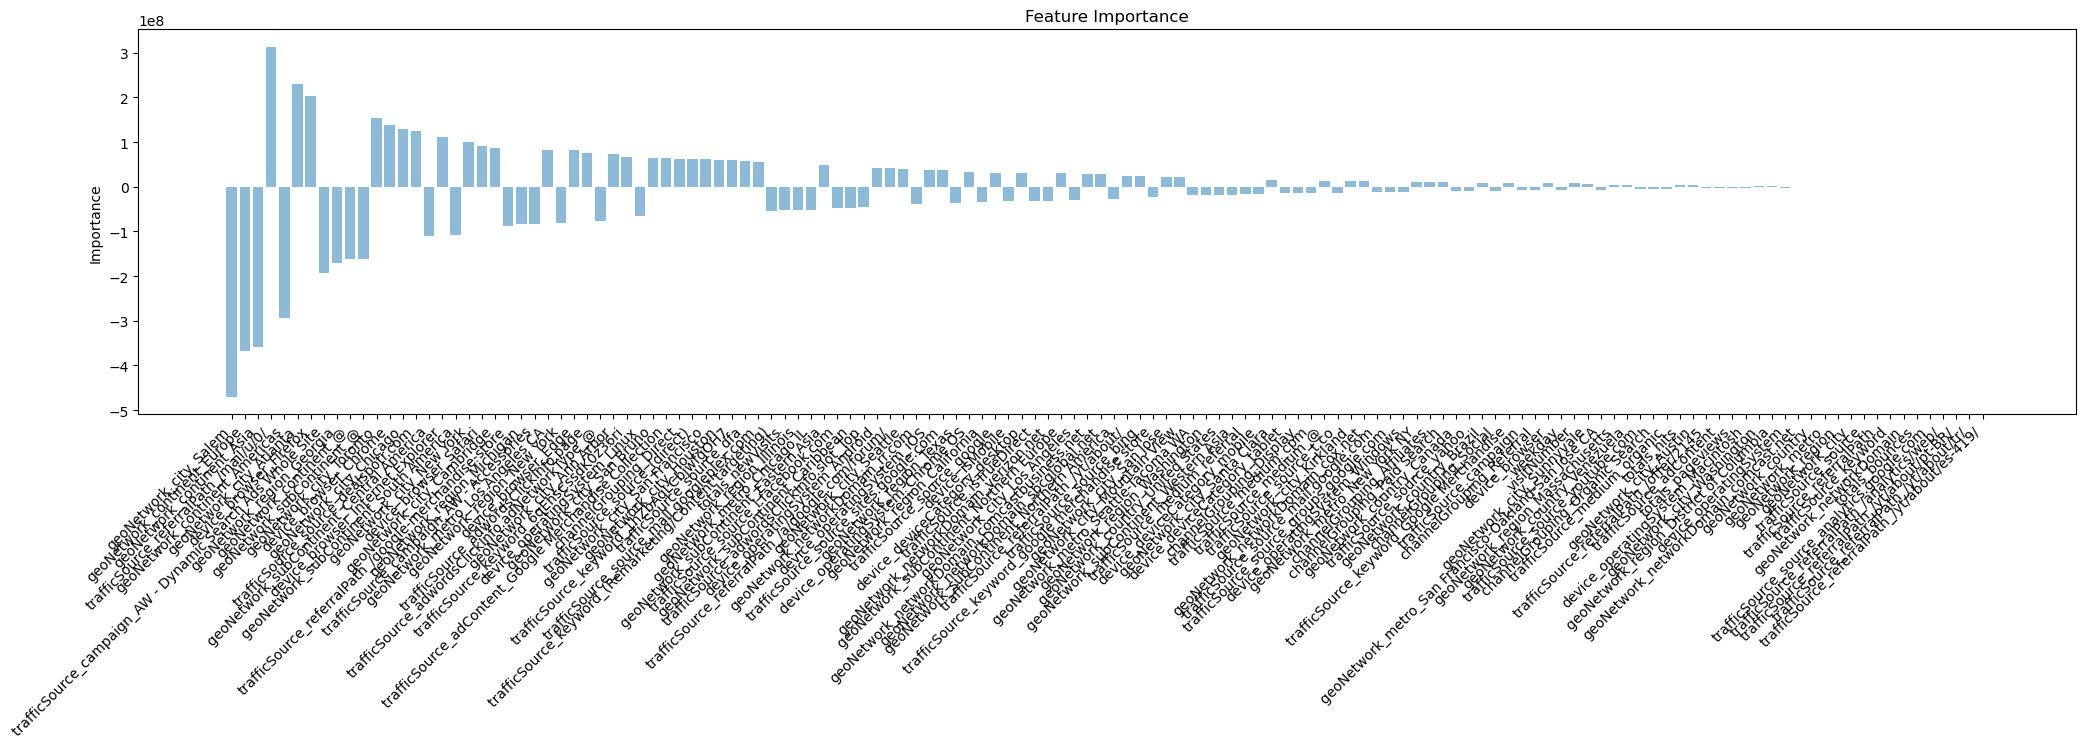

In [11]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

y_pos = np.arange(len(feature_names))
importance = feature_importance_dataframe["importance"].values

fig, ax = plt.subplots(figsize=(25, 5))
plt.bar(y_pos, importance, align='center', alpha=0.5)
plt.xticks(y_pos, feature_importance_dataframe["feature_name"].values)
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha="right")

plt.show()

In [16]:
top_features = feature_importance_dataframe.iloc[:20]

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (10,) and arg 1 with shape (20,).

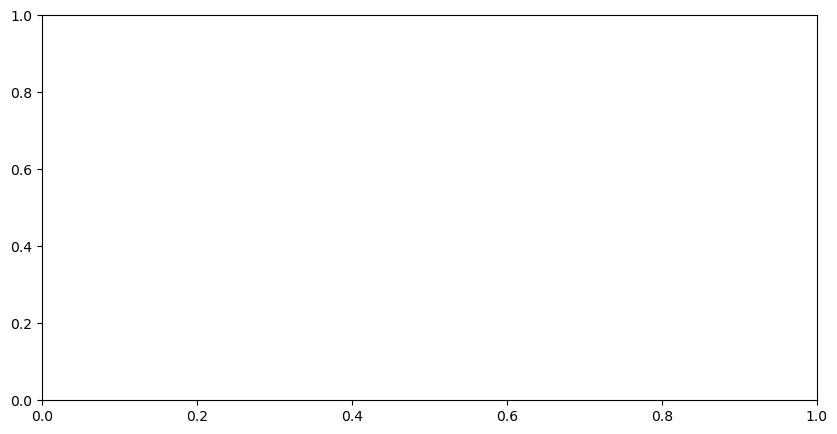

In [19]:
y_pos = np.arange(10)
importance_top = top_features["importance"].values

fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(y_pos, importance_top, align='center', alpha=0.5)
plt.xticks(y_pos, top_features["feature_name"].values)
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha="right")

plt.show()